In [1]:
# mnist_ilk_cnn.ipynb

In [2]:
import numpy as np
import keras
from keras import layers
from keras.callbacks import ModelCheckpoint

2023-12-19 18:58:01.400056: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-19 18:58:01.401330: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-19 18:58:01.423619: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 18:58:01.423646: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 18:58:01.423661: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

2023-12-19 18:58:02.673211: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-19 18:58:02.673691: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:
kontrol = ModelCheckpoint("mnist_cnn.h5",monitor="val_accuracy",mode="max",save_best_only=True)

In [6]:
batch_size = 128
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

hikaye=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,callbacks=[kontrol])


Epoch 1/20
422/422 [==============================] - 6s 13ms/step - loss: 0.3725 - accuracy: 0.8866 - val_loss: 0.0839 - val_accuracy: 0.9785
Epoch 2/20
 14/422 [..............................] - ETA: 5s - loss: 0.1105 - accuracy: 0.9643

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


422/422 [==============================] - 5s 13ms/step - loss: 0.1158 - accuracy: 0.9648 - val_loss: 0.0606 - val_accuracy: 0.9847
Epoch 3/20
422/422 [==============================] - 5s 13ms/step - loss: 0.0880 - accuracy: 0.9731 - val_loss: 0.0479 - val_accuracy: 0.9875
Epoch 4/20
422/422 [==============================] - 5s 13ms/step - loss: 0.0746 - accuracy: 0.9773 - val_loss: 0.0450 - val_accuracy: 0.9878
Epoch 5/20
422/422 [==============================] - 5s 13ms/step - loss: 0.0654 - accuracy: 0.9801 - val_loss: 0.0374 - val_accuracy: 0.9903
Epoch 6/20
422/422 [==============================] - 5s 13ms/step - loss: 0.0583 - accuracy: 0.9810 - val_loss: 0.0369 - val_accuracy: 0.9902
Epoch 7/20
422/422 [==============================] - 5s 13ms/step - loss: 0.0530 - accuracy: 0.9841 - val_loss: 0.0331 - val_accuracy: 0.9905
Epoch 8/20
422/422 [==============================] - 5s 13ms/step - loss: 0.0490 - accuracy: 0.9848 - val_loss: 0.0355 - val_accuracy: 0.9902
Epoch 9/20

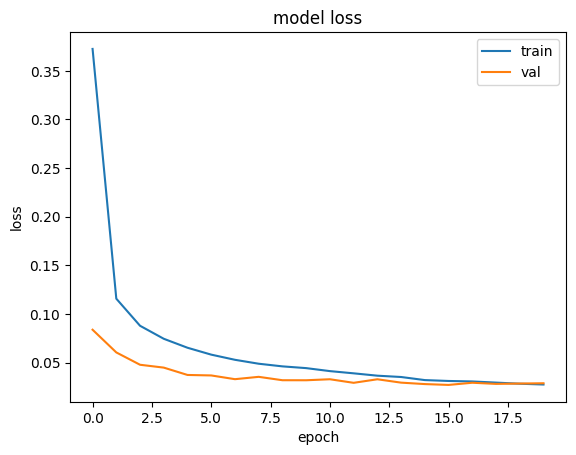

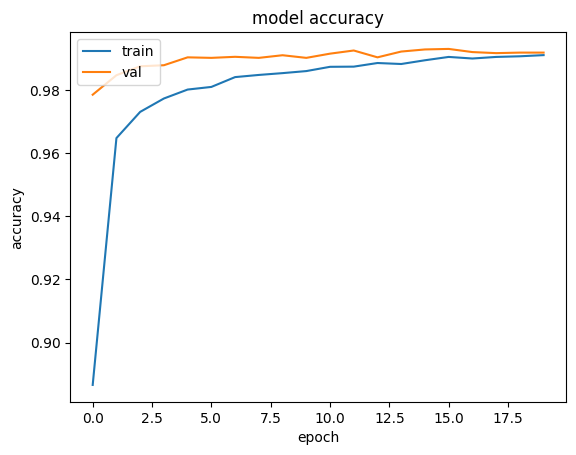

In [8]:
import matplotlib.pyplot as plt

plt.plot(hikaye.history["loss"])
plt.plot(hikaye.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","val"],loc="upper right")
plt.show()

plt.plot(hikaye.history["accuracy"])
plt.plot(hikaye.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","val"],loc="upper left")
plt.show()